In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("dark_background")

In [2]:
df = pd.read_csv("data/001-housing.csv")
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_household"] = df["total_bedrooms"] / df["households"]
df["population_per_household"] = df["population"] / df["households"]

X_cols = ["rooms_per_household", "bedrooms_per_household", "population_per_household"]
Y_cols = ["median_house_value", "median_income"]

X_raw = df[X_cols].to_numpy()
Y_raw = df[Y_cols].to_numpy()

X_raw = X_raw[:200]
Y_raw = Y_raw[:200]

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_household', 'population_per_household'],
      dtype='str')

Text(0.5, 0.98, 'Housing Data')

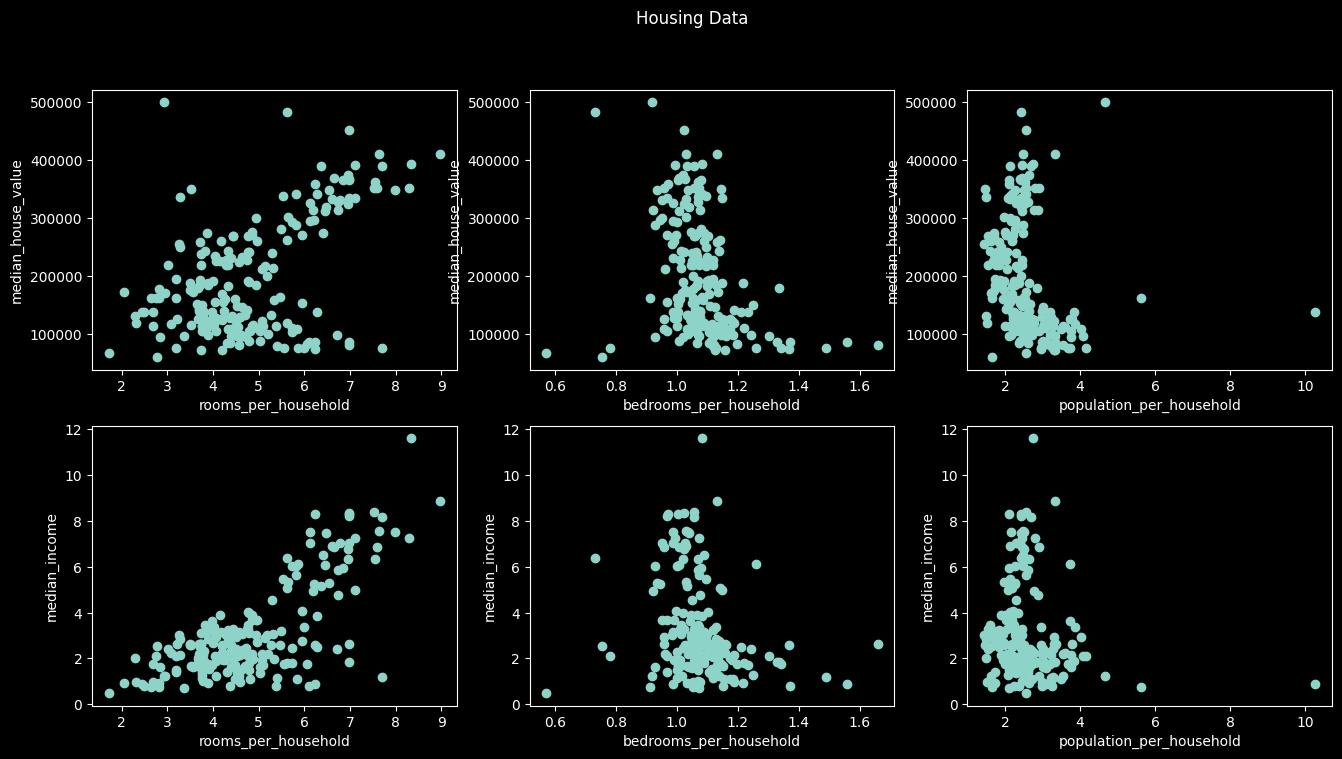

In [3]:
# Raw data graphs

fig, axes = plt.subplots(Y_raw[0, :].size, X_raw[0, :].size, figsize=(16, 8))

for i in range(Y_raw[0, :].size):
    for j in range(X_raw[0, :].size):
        axes[i, j].scatter(X_raw[:, j], Y_raw[:, i])
        axes[i, j].set_xlabel(X_cols[j])
        axes[i, j].set_ylabel(Y_cols[i])

fig.suptitle("Housing Data")

Text(0.5, 0.98, 'Transformed Data')

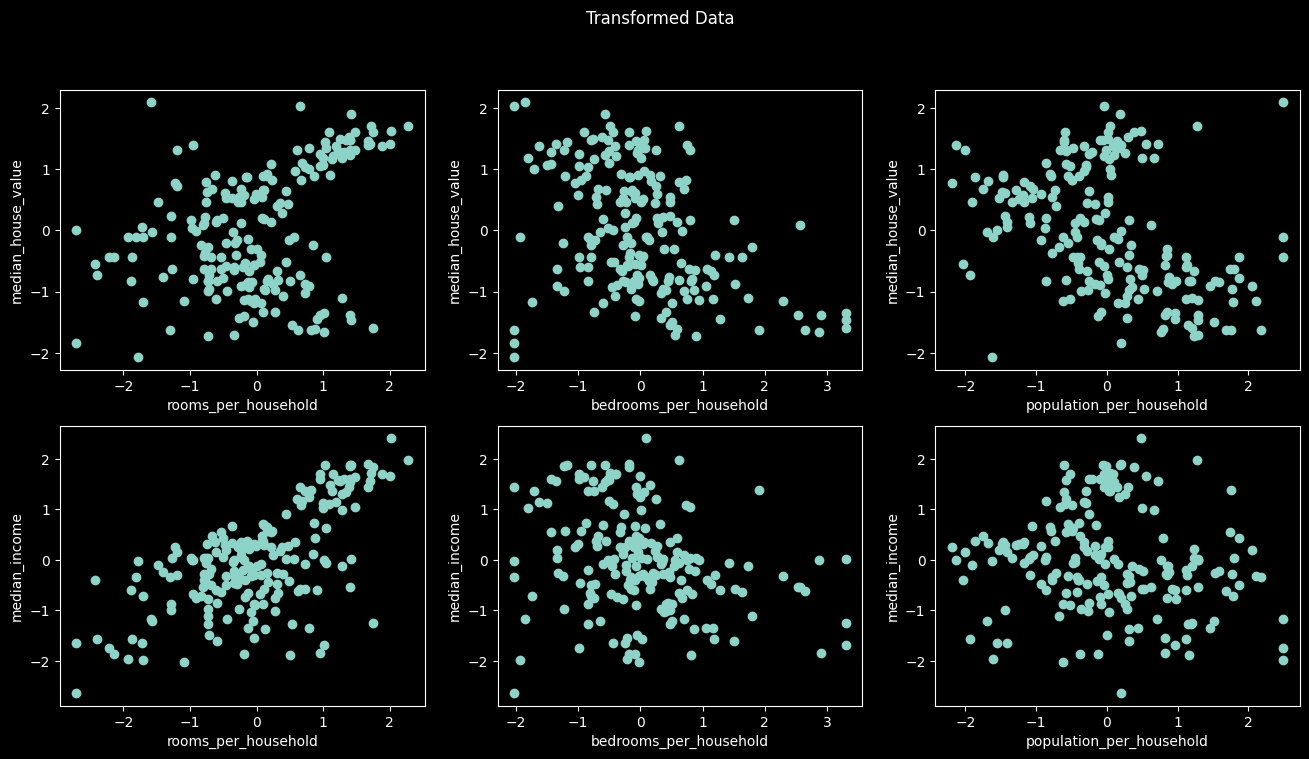

In [4]:
# Transformed data graphs

X = np.log(X_raw)
Y = np.log(Y_raw)

X[:, 0] = np.clip(X[:, 0], 0.75, np.max(X[:, 0]))
X[:, 1] = np.clip(X[:, 1], -0.1, 0.35)
X[:, 2] = np.clip(X[:, 2], np.min(X[:, 2]), 1.5)

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
Y = (Y - np.mean(Y, axis=0)) / np.std(Y, axis=0)

fig, axes = plt.subplots(Y[0, :].size, X[0, :].size, figsize=(16, 8))

for i in range(Y[0, :].size):
    for j in range(X[0, :].size):
        axes[i, j].scatter(X[:, j], Y[:, i])
        axes[i, j].set_xlabel(X_cols[j])
        axes[i, j].set_ylabel(Y_cols[i])

fig.suptitle("Transformed Data")

<Axes: >

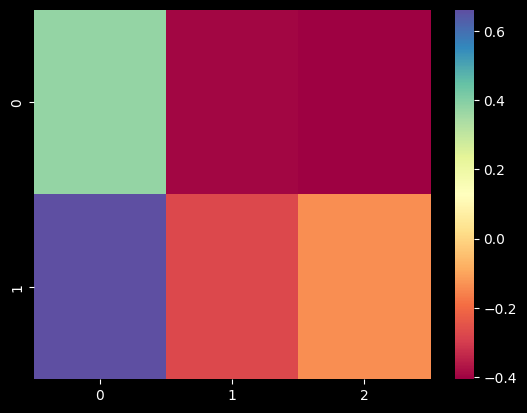

In [5]:
all_data = np.column_stack((X, Y))
corrs = np.corrcoef(all_data, rowvar=False)

sns.heatmap(corrs[3:, :3], cmap="Spectral")